In [1]:
import pbjam as pb
from pbjam.jar import session
import matplotlib.pyplot as plt
import numpy as np
import lightkurve as lk 
import sys

In [2]:
kic = '4448777'
numax = [220.0, 3.0]
dnu = [16.97, 0.01]
teff = [4750, 100]
bp_rp = [1.34, 0.01]

In [3]:
# Initialize a jam session with a single star:
jam_sess = session(ID = [kic], numax = [numax], dnu = [dnu], teff = [teff], bp_rp = [bp_rp], 
                   nthreads=1, use_cached=False)

In [4]:
# Result is always a list of star class instances
# Taking the first one as an example
star = jam_sess.stars[0]

In [5]:
star.asymptotic_modeid(norders = 7)

Burningham
Sampling


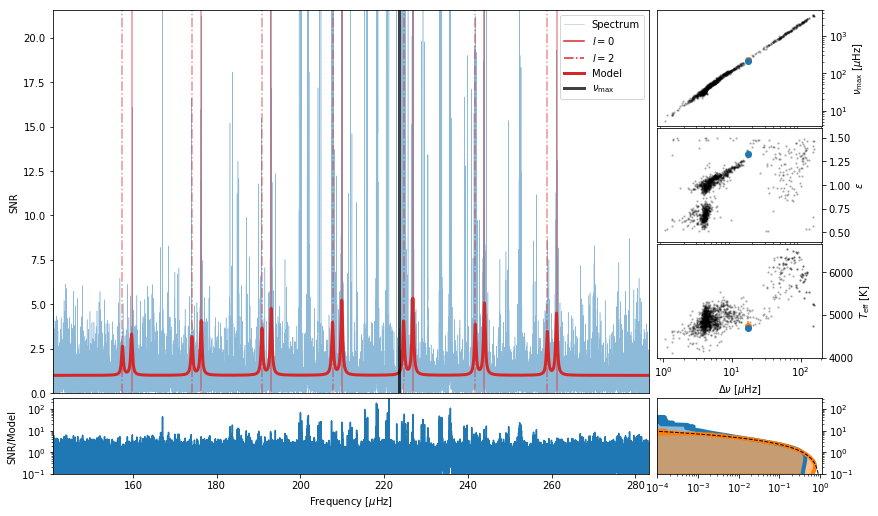

In [8]:
fig = star.plot_asyfit()

In [9]:
from pbjam import peakbag 
import pymc3 as pm
import importlib

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [23]:
importlib.reload(peakbag)
pb = peakbag.peakbag(star.f, star.s, star.asy_result)

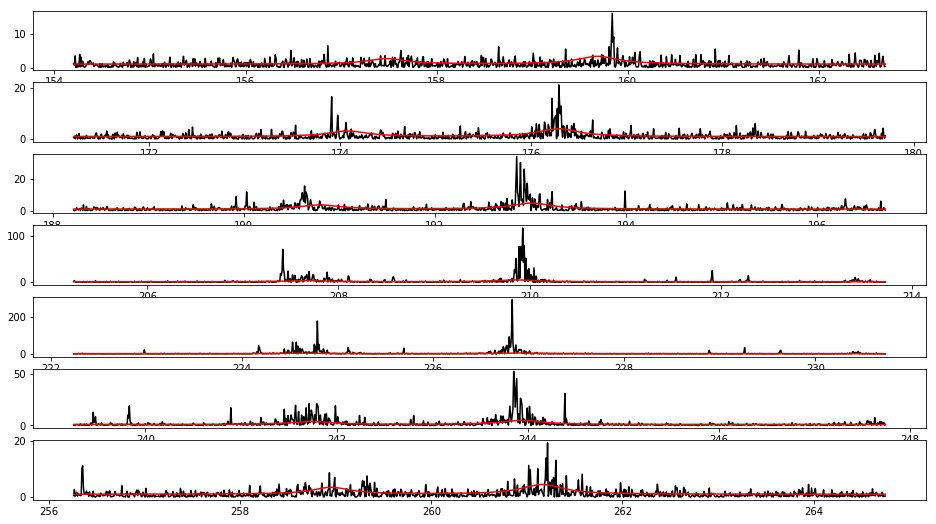

In [24]:
pb.plot_start_model()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [back, height2, height0, width2, width0, l2, l0]
Sampling 4 chains: 100%|██████████| 8000/8000 [04:31<00:00, 29.50draws/s]
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 21 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.01449335793149627, but should be close to 0.8. Try to increase the number of tuning steps.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6132137907182619, but should be close to 0.8. Try to increase the number of tuning steps.
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated numbe

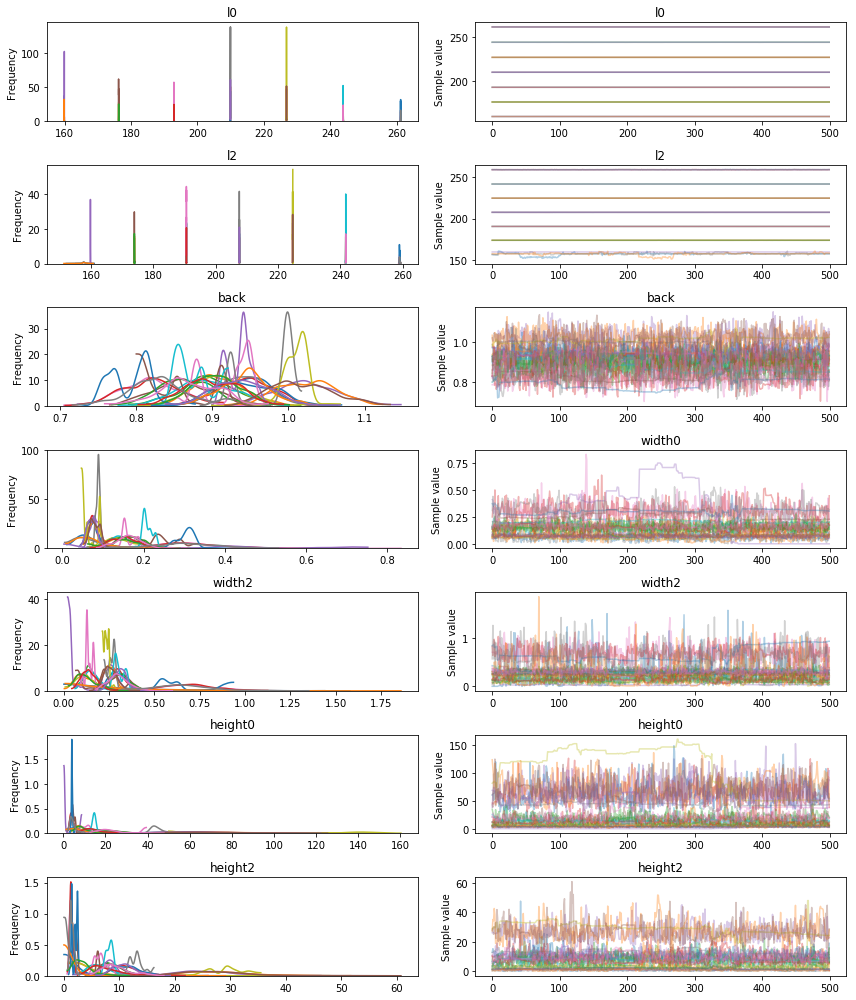

In [29]:
pb.sample(model_type='simple', cores=4, tune=1500)

In [26]:
pm.summary(pb.samples)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
l0__0,159.839041,0.011996,0.000383,159.813873,159.861636,988.246806,0.999317
l0__1,176.267537,0.017004,0.000467,176.232186,176.298676,1206.081502,1.000545
l0__2,192.920000,0.014718,0.000427,192.888394,192.945963,1105.797194,0.999629
l0__3,209.924658,0.007405,0.000212,209.910015,209.938757,1087.777263,0.999993
l0__4,226.816696,0.007570,0.000230,226.802218,226.831687,638.559138,1.006064
l0__5,243.883764,0.015238,0.000365,243.856695,243.915878,1359.430799,1.000618
l0__6,261.206485,0.031052,0.000819,261.154339,261.276516,1153.397131,1.001233
l2__0,157.120716,1.754752,0.156698,152.836483,159.945337,24.292981,1.073504
l2__1,173.944830,0.026057,0.000701,173.896664,173.995749,1361.311480,1.001004
l2__2,190.623711,0.018582,0.000659,190.587178,190.657456,518.455997,1.002886


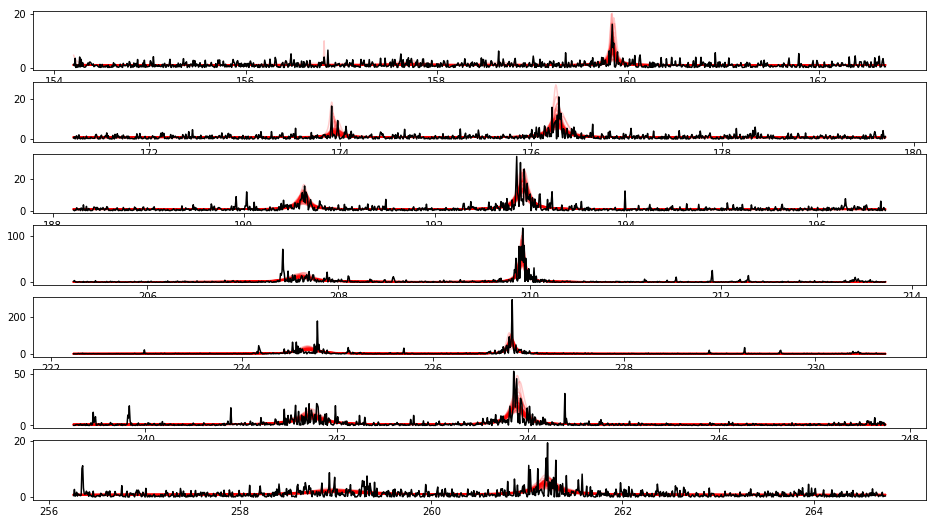

In [27]:
pb.plot_fit(thin=10)

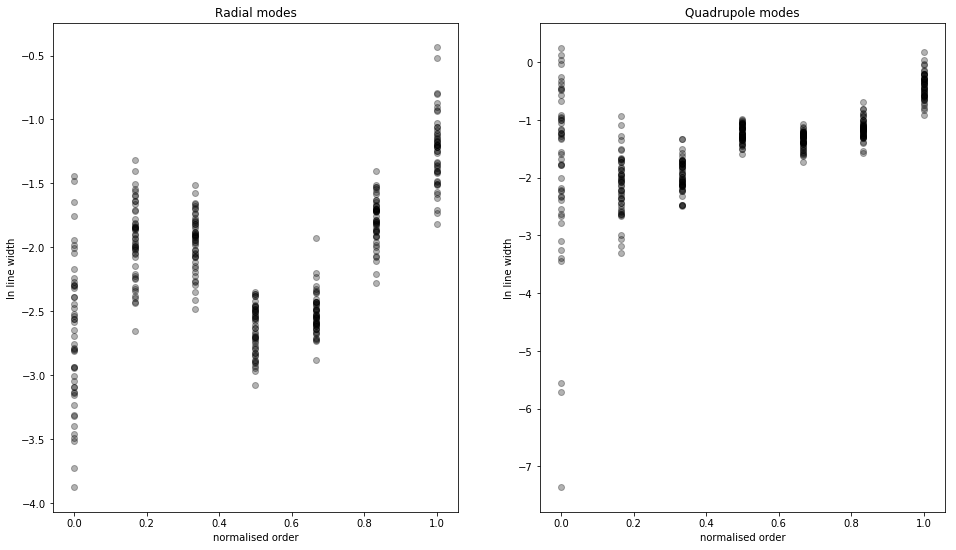

In [28]:
pb.plot_linewidth()

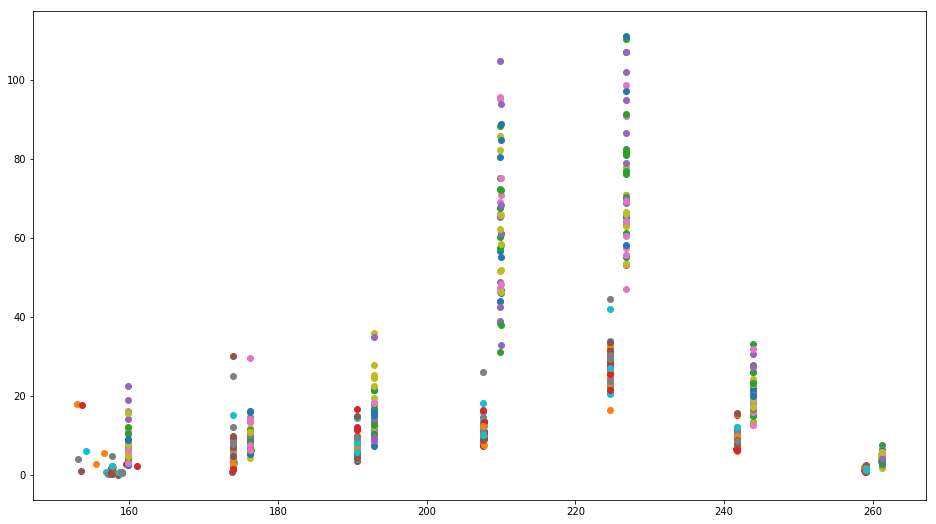

In [36]:
pb.plot_height(thin=10)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [back, he

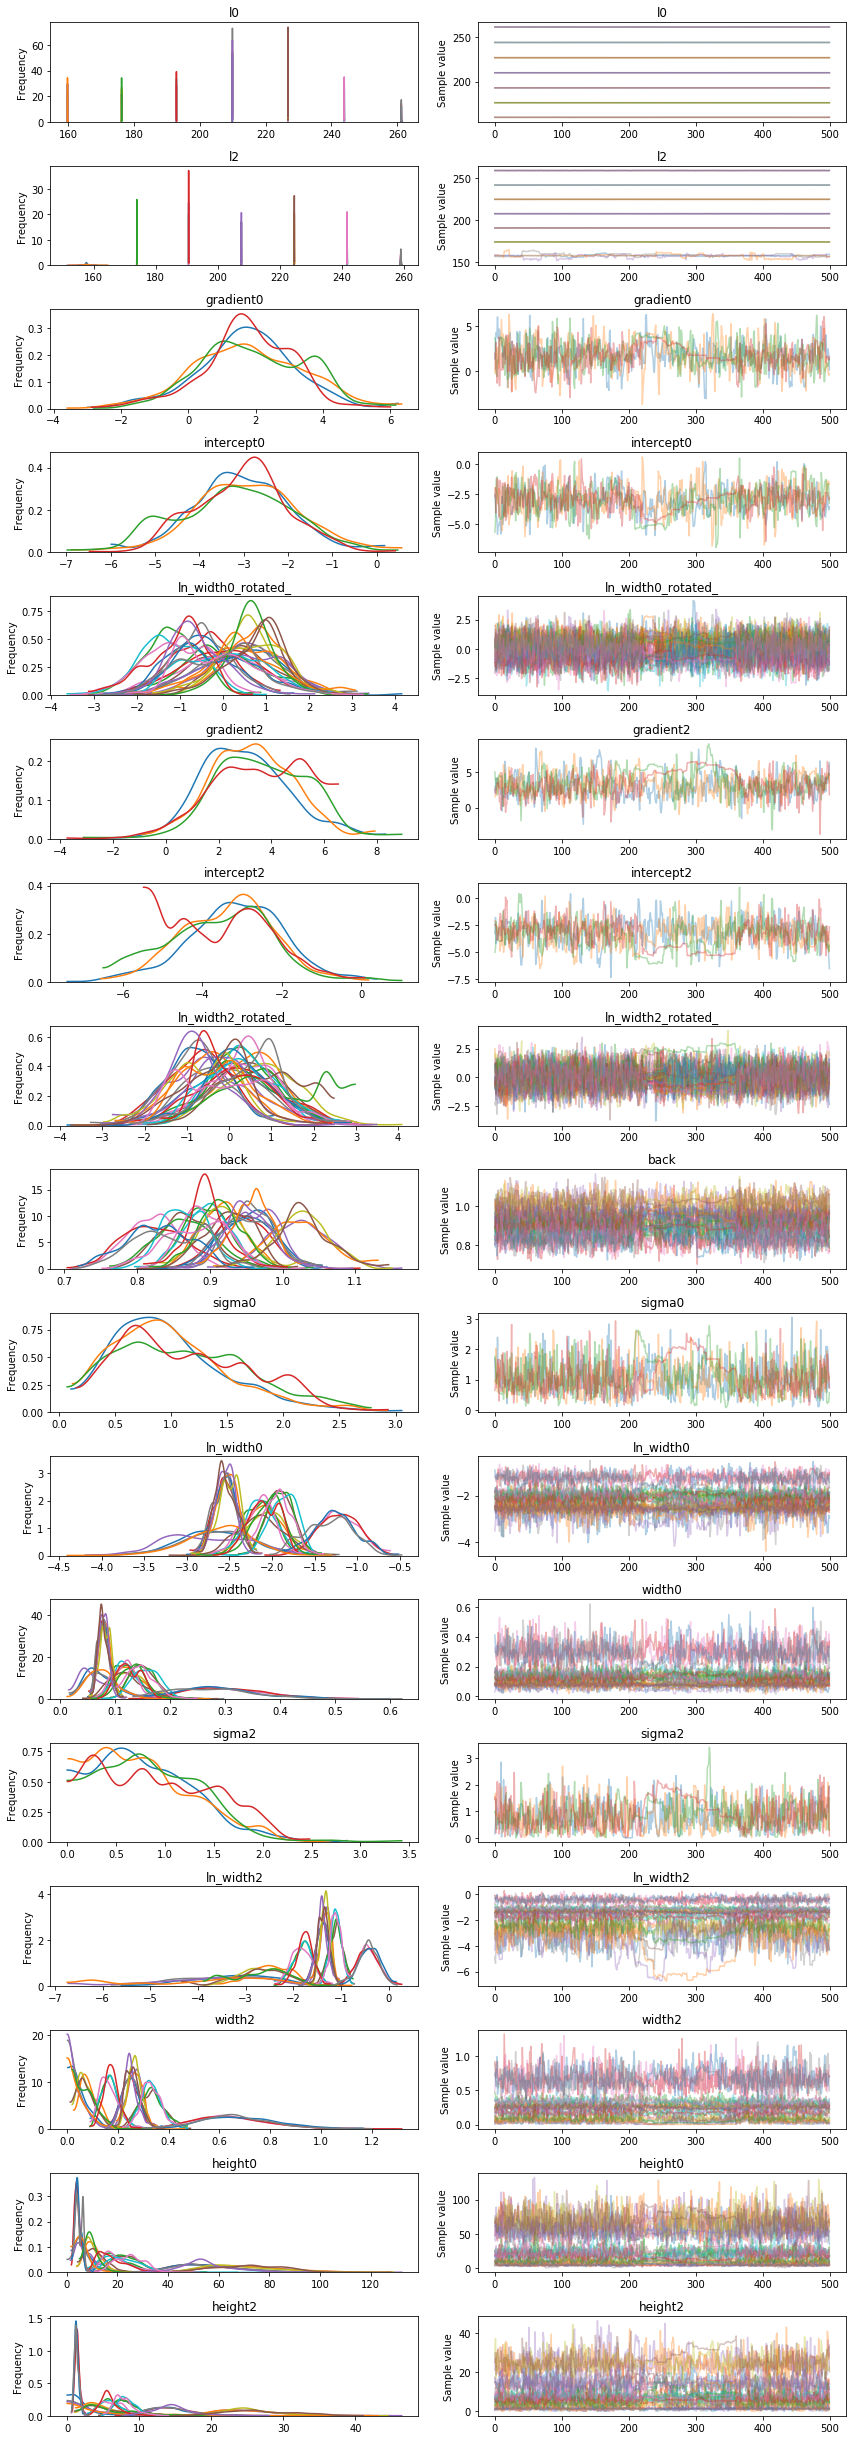

In [30]:
pb_gp = peakbag.peakbag(star.f, star.s, star.asy_result)
pb_gp.sample(model_type='model_gp', cores=4, tune=1500)

In [31]:
pm.summary(pb_gp.samples)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
l0__0,159.839008,0.015763,0.000676,159.811434,159.871627,403.830836,1.000022
l0__1,176.267935,0.015399,0.000400,176.240337,176.301222,1220.984891,1.000749
l0__2,192.918474,0.013147,0.000486,192.893292,192.944684,263.736076,1.006218
l0__3,209.924305,0.007081,0.000178,209.910934,209.938644,1767.824519,0.999547
l0__4,226.816494,0.007647,0.000215,226.802004,226.832189,1184.621533,1.001108
l0__5,243.883219,0.014062,0.000333,243.855562,243.910015,2208.097419,0.999148
l0__6,261.206223,0.029009,0.000851,261.148568,261.265171,987.651939,1.001018
l2__0,157.555545,1.685251,0.131268,153.078194,160.549578,57.528225,1.061435
l2__1,173.937218,0.021419,0.000744,173.900515,173.983700,478.489376,1.001554
l2__2,190.621847,0.017976,0.000433,190.583231,190.654917,1669.387352,1.000113


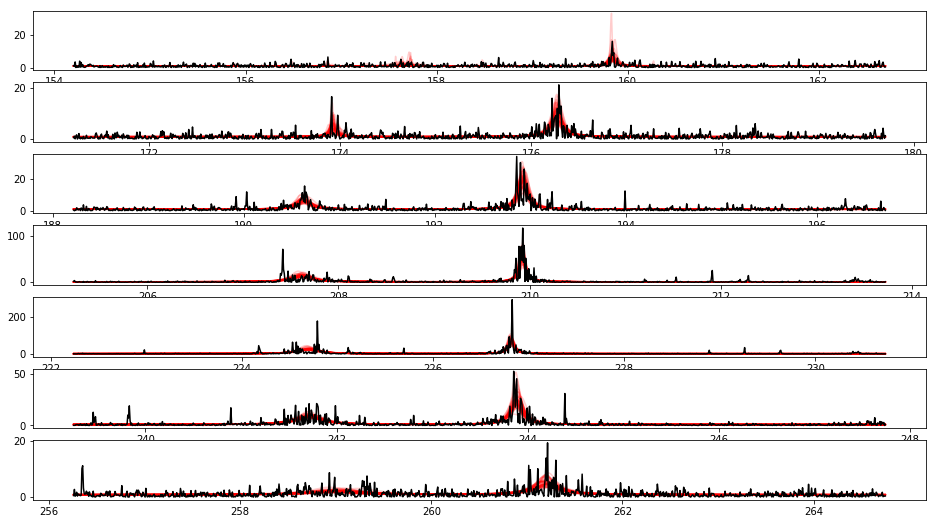

In [32]:
pb_gp.plot_fit(thin=10)

100%|██████████| 1000/1000 [00:13<00:00, 75.33it/s]


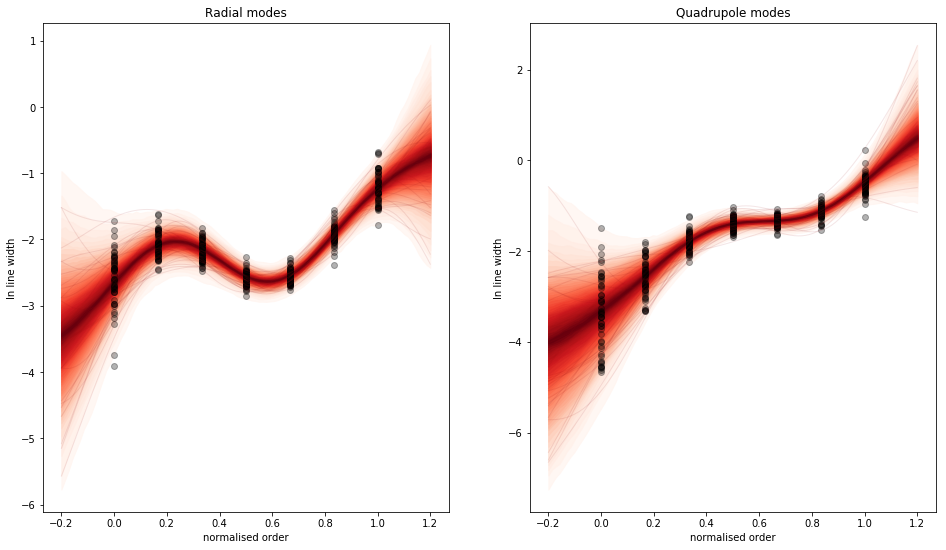

In [33]:
pb_gp.plot_linewidth(thin=10)

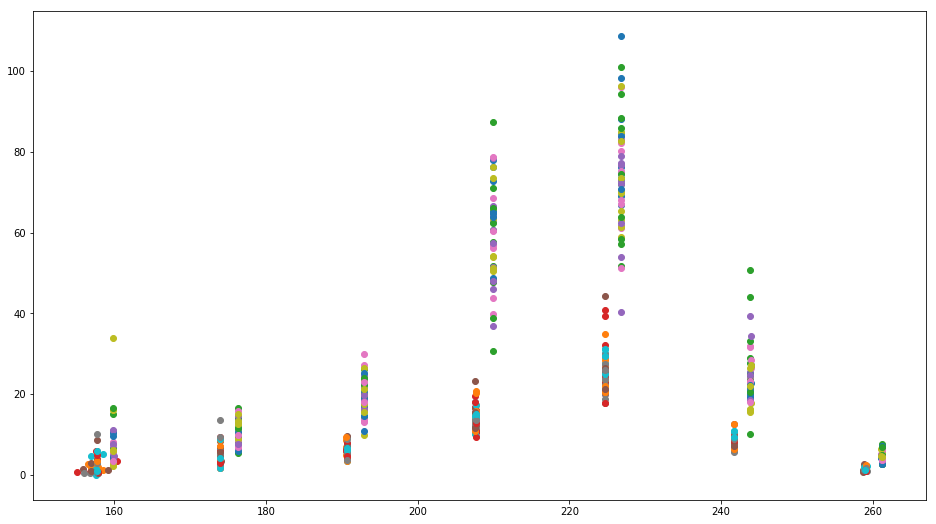

In [34]:
pb_gp.plot_height(thin=10)